In [140]:
!pip install vaderSentiment

In [141]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
import string
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

In [142]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [143]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
analyzer = SentimentIntensityAnalyzer()

In [144]:
def wordopt(text):
    text=text.lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub("\\W"," ",text)
    text=re.sub('https?://\S+|www\.\S+','',text)
    text=re.sub('<.*?>+','',text)
    text=re.sub('[%s]'% re.escape(string.punctuation),'',text)
    text=re.sub('\n','',text)
    text=re.sub('\w*\d\w*','',text)
    return text

In [145]:
df = pd.read_csv(r"C:\Users\HP\Downloads\sentiment_analysis.csv")
df

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
0,2018,8,18,morning,What a great day!!! Looks like dream.,positive,Twitter
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",positive,Facebook
2,2017,8,18,night,Don't angry me,negative,Facebook
3,2022,6,8,morning,We attend in the class just for listening teac...,negative,Facebook
4,2022,6,8,noon,"Those who want to go, let them go",negative,Instagram
...,...,...,...,...,...,...,...
494,2015,10,18,night,"According to , a quarter of families under six...",negative,Twitter
495,2021,2,25,morning,the plan to not spend money is not going well,negative,Instagram
496,2022,5,30,noon,uploading all my bamboozle pictures of facebook,neutral,Facebook
497,2018,8,10,night,congratulations ! you guys finish a month ear...,positive,Twitter


In [146]:
df['date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

In [147]:
df["text"]=df["text"].apply(wordopt)
df

,Year,Month,Day,Time of Tweet,text,sentiment,Platform,date
0,2018,8,18,morning,what a great day looks like dream,positive,Twitter,2018-08-18
1,2018,8,18,noon,i feel sorry i miss you here in the sea beach,positive,Facebook,2018-08-18
2,2017,8,18,night,don t angry me,negative,Facebook,2017-08-18
3,2022,6,8,morning,we attend in the class just for listening teac...,negative,Facebook,2022-06-08
4,2022,6,8,noon,those who want to go let them go,negative,Instagram,2022-06-08
...,...,...,...,...,...,...,...,...
494,2015,10,18,night,according to a quarter of families under six...,negative,Twitter,2015-10-18
495,2021,2,25,morning,the plan to not spend money is not going well,negative,Instagram,2021-02-25
496,2022,5,30,noon,uploading all my bamboozle pictures of facebook,neutral,Facebook,2022-05-30
497,2018,8,10,night,congratulations you guys finish a month ear...,positive,Twitter,2018-08-10


In [148]:
def get_sentiment_score(text):
    return analyzer.polarity_scores(text)['compound']

def classify_sentiment(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['sentiment_score'] = df['text'].apply(get_sentiment_score)
df['predicted_sentiment'] = df['sentiment_score'].apply(classify_sentiment)

In [149]:
comparison = df[['sentiment', 'predicted_sentiment']].value_counts().reset_index(name='count')
print("\n🔍 Comparison of Labeled vs Predicted:\n", comparison)


🔍 Comparison of Labeled vs Predicted:
   sentiment predicted_sentiment  count
0  positive            positive    147
1   neutral             neutral    105
2  negative            negative     78
3   neutral            positive     68
4  negative            positive     30
5  negative             neutral     26
6   neutral            negative     26
7  positive             neutral     11
8  positive            negative      8


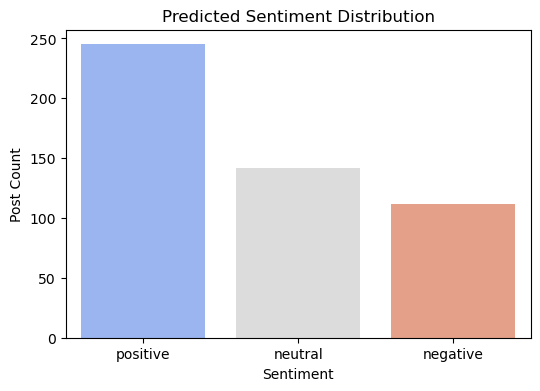

In [150]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='predicted_sentiment', order=['positive', 'neutral', 'negative'], palette='coolwarm')
plt.title("Predicted Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Post Count")
plt.show()

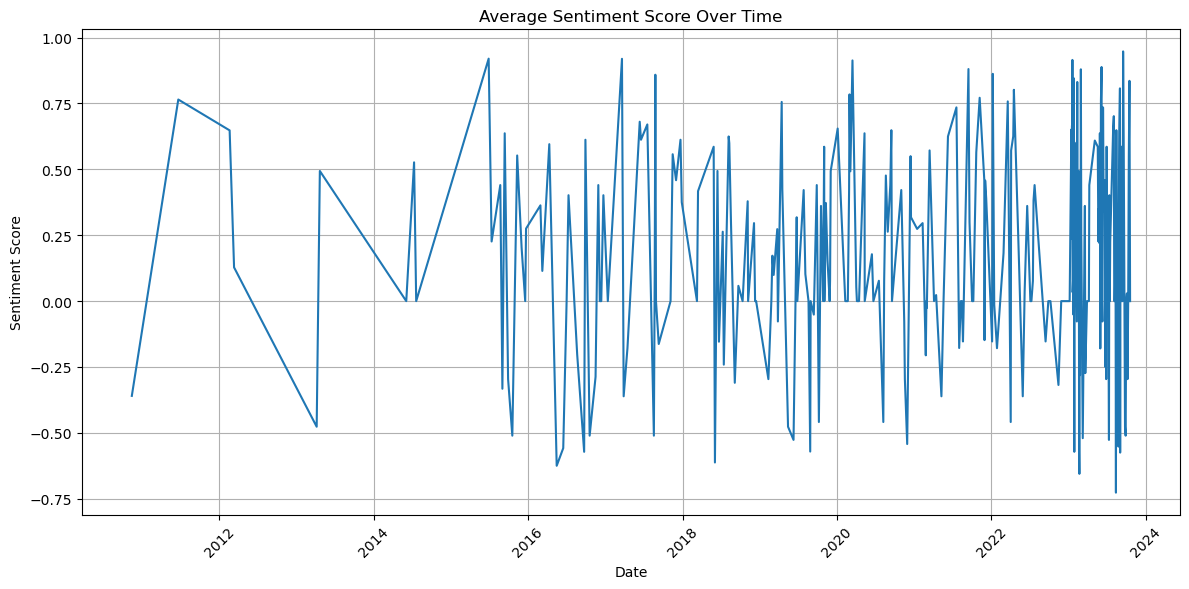

In [174]:


daily = df.groupby('date')['sentiment_score'].mean().reset_index()

plt.figure(figsize=(12,6))
plt.plot(daily['date'], daily['sentiment_score'])
plt.title('Average Sentiment Score Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

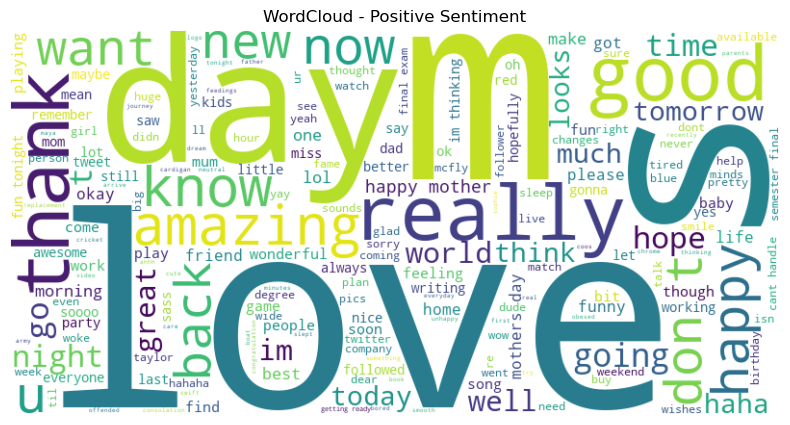

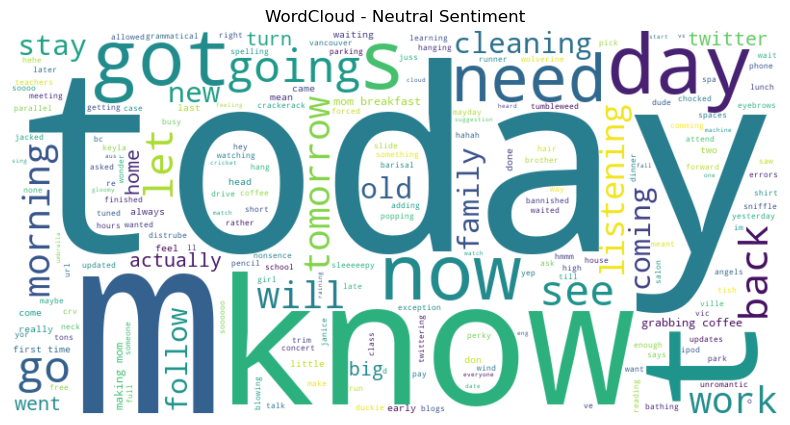

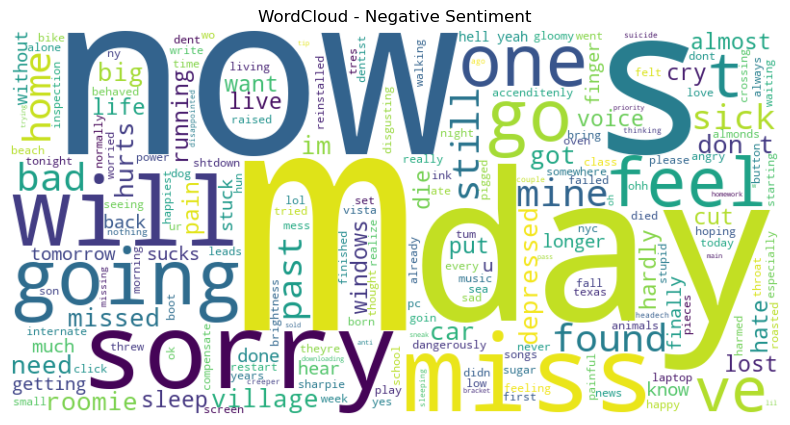

In [152]:
for sentiment in ['positive', 'neutral', 'negative']:
    text = " ".join(df[df['predicted_sentiment'] == sentiment]['text'].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud - {sentiment.capitalize()} Sentiment")
    plt.show()


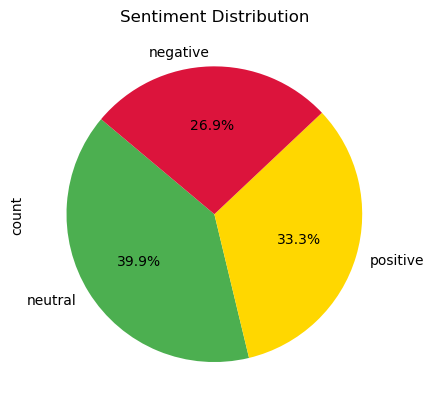

In [176]:
# Sentiment Distribution (Pie Chart)
df['sentiment'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=140,
    colors=['#4CAF50', '#FFD700', '#DC143C']  # Green, Gold, Crimson
)
plt.title('Sentiment Distribution')
plt.show()